# Deep Learning from scratch Chap4
* from 4.4 gradient~

## 4.4 기울기(gradient)

* x0와 x1의 편미분을 동시에 계산하고 싶다면 어떻게 해야할까?
* 모든 변수의 편미분을 벡터로 정리한 것을 기울기(gradient)라고 한다.

In [32]:
# 모든 변수의 편미분을 벡터로 정리한 것을 기울기(gradient)라고 한다.

import numpy as np

def numerical_gradient(f, x):  # f는 어떤 function일테고 x는 function의 인자
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)  # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val  # 값 복원
        
    return grad

In [3]:
import numpy as np

def numerical_gradient(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)  # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val  # 값 복원   
                          # 맨 처음 값으로 다시 돌아간다
    return grad

#### numerical_gradient를 어떻게 해석할 수 있을까?

* 넘파이 배열 x의 각 원소에 대해서 수치 미분을 구한다


In [4]:
def function_2(x):
    return np.sum(x**2)

In [5]:
# numerical_gradient를 사용해서 실제 기울기를 계산해보자
# (3, 4), (0, 2), (3, 0)에서의 기울기를 구해보자!


print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


이처럼 (x0, x1)의 각 점에서의 기울기를 계산할 수 있다

No handles with labels found to put in legend.


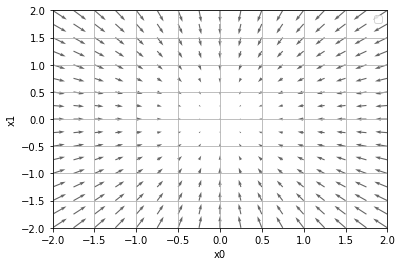

In [6]:
# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()


* 기울기 그림은 위의 그림처럼 방향을 가진 벡터(화살표)로 그려진다.
* 그림을 보면 기울기는 함수의 가장 낮은 장소(최솟값)을 가리킨다.
* 마치 나침반처럼 화살표들은 한 점을 향하고 있다.
* 또한 가장 낮은 곳에서 멀어질수록 화살표의 크기가 커짐을 알 수 있다.

* 기울기는 가장 낮은 장소를 가리키지만, 실제로 반드시 그렇다고는 할 수 없다.
* 사실 기울기는 각 지점에서 낮아지는 방향을 가리키다.
* 더 정확히 말하자면 **기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향이다**.
* 반드시 기억하도록 하자!

### 4.4.1 경사법(경사 하강법)

* 기계학습 문제 대부분은 학습 단계에서 최적의 매개변수를 찾아낸다.
* 신경망 역시 최적의 매개변수(가중치와 편향)를 학습 시에 찾아야 한다.
* **최적이란 손실 함수가 최솟값이 될 때**의 **매개변수 값**이다.


* 하지만 일반적인 문제의 손실 함수는 매우 복잡하다.
* 매개변수 공간이 광대하여 어디가 최솟값이 되는 곳인지를 짐작할 수 없다.
* 이런 상황에서 기울기를 잘 이용해 함수의 최솟값(또는 가능 한 작은 값)을 찾으려는 것이 경사법이다.

#### 중간 정리
* 앞서 기계학습의 학습 지표를 **손실 함수**라고 설명했다.
* 학습이 잘 되었다는 것은 손실 함수가 최솟값이 되었다는 것이다.
* 최적의 매개변수를 찾는 것도 마찬가지이다. 최적이란 손실 함수가 최솟값이 될 때의 매개변수 값이다.
* 정리하면 손실 함수를 최소화해서 최적의 매개변수를 찾기 위해서 우리는 **경사법(Gradient Descent)**을 배운다.

* 주의할 점
    * 여기서 주의할 점은 각 지점에서 함수의 값을 낮추는 방안을 제시하는 지표가 기울기라는 것이다.
    * 그러나 기울기가 가리키는 곳에 정말 함수의 최솟값이 있는지, 즉 그쪽이 정말로 나아갈 방향인지는 보장할 수 없다.
    * 실제로 복잡한 함수에서는 기울기가 가리키는 방향에 최솟값이 없는 경우가 대부분이다.

* 경사법
    * 현 위치에서 기울어진 방향으로 일정 거리만큼 이동한다.
    * 그런 다음 이동한 곳에서도 마찬가지로 기울기를 구하고, 또 기울어진 방향으로 나아가기를 반복한다.
    * 이렇게 해서 함수의 값을 점차 줄여가는 방법을 **경사법**이라고 한다.
    * 경사법은 기계학습을 최적화하는 데 흔히 쓰는 방법이다. 특히 신경망의 학습에서 많이 사용된다
   

In [11]:
# 간단한 경사 하강법 구현하기
# 앞서 구현한 numerical_gradient()활용

def gradient_descent(f, init_x, lr=0.01, step_num=100):  # 함수 f, 초깃값 init_x, 학습률 lr, 스텝 사이즈 step_num
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr*grad
    return x  # return x?

* 문제 : 경사법으로 f(x0, x1) = x0x0 + x1x1의 최솟값을 구하여라

In [12]:
def function_x(x):
    return np.sum(x)

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

* grahp로 그려보기

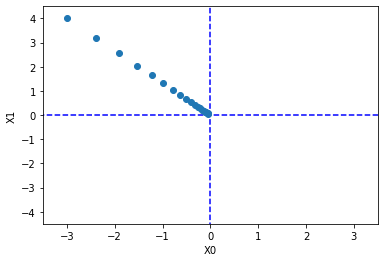

In [9]:
import numpy as np
import matplotlib.pylab as plt

def numerical_gradient(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)  # x와 형상이 같은 배열 생성
    
    for idx in range(x.size):
        tmp_value = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_value + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_value - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_value  # 값 복원
    return grad

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []
    
    for i in range(step_num):
        x_history.append( x.copy() )
        
        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

import numpy as np

def function_2(x):
    return np.sum(x**2)


init_x = np.array([-3.0, 4.0])
lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x=init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0, 0], '--b')
plt.plot( [0, 0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()



* 학습률을 크게 할 경우
* 학습률을 작게 할 경우
* 값이 어떻게 변하는지 확인해보자

In [13]:
# 학습률이 너무 큰 예 : lr=10.0

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [14]:
# 학습률이 너무 작은 경우 : lr=0.0000000001

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

*  학습률이 너무 클 경우 값이 발산하고
*  학습률이 너무 작을 경우 값이 거의 갱신되지 않은 채 끝난다.

#### 하이퍼 파라미터(hyper parameter)
* 학습률과 같은 매개변수를 **하이퍼 파라미터**라고 한다.
    * 이는 가중치와 편향 같은 신경망의 매개변수와는 성질이 다른 매개변수이다.
    * 신경망의 가중치 매개변수는 훈련 데이터와 학습 알고리즘에 의해서 '자동'으로 획득되는 매개변수인 반면, 
    * 학습률과 같은 하이퍼파라미터는 사람이 직접 설정해야 하는 매개변수인 것이다.
    * 일반적으로 이 하이퍼파라미터들은 여러 후보 값 중에서 시험을 통해 가장 잘 학습하는 값을 찾는 과정을 거쳐야 한다.

### 4.4.2 신경망에서의 기울기

* **신경망 학습**에서도 **기울기**를 구해야 한다.
* 여기서 말하는 기울기는 **가중치 매개변수에 대한 손실 함수의 기울기이다.**
* 가중치 매개변수에 대한 손실 함수의 기울기라고?

* simpleNet class를 통해 실제로 기울기를 구하는 코드를 구현해보자

In [34]:
import sys, os
sys.path.append('C:\\Users\\stevelee\\Documents\\30-Days-Challenges\\deep_learning_scratch_master\\deep-learning-from-scratch-master')
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient
    
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)  # 정규분포로 초기화
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [35]:
net = simpleNet()
print(net.W)  # 가중치 매개변수

[[ 0.04802851  0.3452542  -0.10071152]
 [-0.67675236 -0.66349916  1.88902712]]


In [36]:
x = np.array([0.6, 0.9])
p = net.predict(x)  # simpleNet의 메서드
print(p)  # 예측값 출력
print(np.argmax(p))  # 최댓값의 인덱스

[-0.58026001 -0.38999672  1.63969749]
2


In [37]:
# 정답 레이블을 입력한 뒤 로스 값을 구해보자

t = np.array([0, 0, 1])
net.loss(x, t)

0.2151027166565914

#### 이어서 기울기를 구해보자
* 지금까지처럼 numerical_gradient(f, x)를 써서 구하면 된다. 

In [40]:
def f(W):
    return net.loss(x, t)

In [41]:
# 여기서 정의한 f(W) 함수의 인수 W는 더미(dummy)로 만든 것이다
# 더미란 무엇인가?

# https://kkokkilkon.tistory.com/37
# 더미변수는 범주형 변수를 연속형 변수로 변환한 것이다. 정획히 따지면 연속형 변수"스럽게" 만든 것이다.

In [42]:
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.05255547  0.06356942 -0.11612489]
 [ 0.07883321  0.09535412 -0.17418733]]


In [43]:
# python lambda로 구현하기

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

In [44]:
print(dW)

[[ 0.05255547  0.06356942 -0.11612489]
 [ 0.07883321  0.09535412 -0.17418733]]


In [45]:
# hummmm.... 이해가 잘 안가는군... 20.01.29.Wed.pm12:15